In [1]:
import re
import pandas as pd
from konlpy.tag import Twitter, Komoran
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim
from pandas.io.json import json_normalize
import glob
import os
import matplotlib.pylab as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from PIL import Image
import numpy as np
from wordcloud import WordCloud

In [2]:
csv_lists = glob.glob("./Data/*.csv")

for i in range(len(csv_lists)):
    get_text = csv_lists[i].replace("\\","/")
    csv_lists[i] = get_text

In [3]:
news_list = []
for i in range(len(csv_lists)):
    file = csv_lists[i]
    frame = pd.read_csv(file)
    news_list.append(frame)
news = pd.concat(news_list, ignore_index=True)

In [4]:
if os.path.isdir('./Analyze'):
    pass
else:
    os.mkdir('./Analyze')

news.to_csv("./Analyze/news_tot.csv",encoding='utf-8')

In [5]:
news

,title,date,press,contents,link
0,[2004 수능 전망과 대입 전략] 고배점 ‘3점문항’에 승부수 던져라\n : 네이...,2003.03.31,국민일보,2004학년도 대입수능의 특징은 난이도가 지난해와 큰 차이가 없고 전문항 정수에 따...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,尹부총리 “대학입시 기본틀 유지” : 네이버 뉴스,2003.03.14,media KHAN,윤덕홍 부총리 겸 교육인적자원부 장관은 현행 대학입시의 기본적인 틀을 오는 2005...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,[2004 수능 전망과 대입 전략] 통합교과적 문항 출제\n : 네이버 뉴스,2003.03.31,국민일보,올 수능이 지난해와 비슷한 난이도로 출제될 것으로 예상됨에 따라 수험생의 부담이 더...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,[대입준비] 과외도 이젠 인터넷으로 : 네이버 뉴스,2003.04.08,매경닷컴,■ 국어■ ◇서주홍의 문학 속으로(myhome2.naver.com/qseo)＝고전...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,서울대 대학원입시 TOEFL도 인정 : 네이버 뉴스,2003.04.17,연합뉴스,(서울=연합뉴스) 고일환 기자 = 최근 수년동안 지원자가 줄어들었던 서울대 대학원...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
49801,숨가쁜 대입 일정…“수능 난이도 조정 필요” : 네이버 뉴스,2020.05.22,KBS,[KBS 청주][앵커]어렵게 학교로 돌아온 고3 수험생들은 숨 막히는 대입 일정을 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
49802,"대구사이버대, 상업광고판에 입시 대신 캠페인 광고 걸어 : 네이버 뉴스",2020.03.24,financial news,대구사이버대가 상업광고판에 입시광고 대신 '힘내요 대구경북! 함께 이겨냅시다' 캠페...,https://news.naver.com/main/read.nhn?mode=LSD&...
49803,고3 20일 등교·다른 학년도 일주일씩 순연…“대입일정 변경 없어” : 네이버 뉴스,2020.05.11,KBS,이태원 클럽 관련 코로나19 확진자가 계속 늘어감에 따라 교육 당국이 등교수업 시작...,https://news.naver.com/main/read.nhn?mode=LSD&...
49804,"정 총리 ""9일부터 순차적 온라인 개학…입시 일정 조정"" : 네이버 뉴스",2020.03.31,뉴시스,"""등교 개학 어려워…학교 매개 감염 확산 우려도"" ""온라인 개학 유력…단말기·인터넷...",https://news.naver.com/main/read.nhn?mode=LSD&...


In [6]:
# 기사 내용이 중복되는 것 확인하는 코드
# 웹크롤링 할 때에도 기사 중복 제외했었음. 그 때는 링크가 동일하였고, 이제는 제목이 같은 것을 제외함.
news[news.duplicated(['contents'], keep=False)].sort_values('contents')

,title,date,press,contents,link
10926,'대입합격 기원등' : 네이버 뉴스,2008.09.30,뉴시스,'대입합격 기원등' \t 【부산=뉴시스】 30일 부산 남구 용호동 예문...,https://news.naver.com/main/read.nhn?mode=LSD&...
10853,'대입합격 기원등' : 네이버 뉴스,2008.09.30,뉴시스,'대입합격 기원등' \t 【부산=뉴시스】 30일 부산 남구 용호동 예문...,https://news.naver.com/main/read.nhn?mode=LSD&...
11349,'입시전쟁' : 네이버 뉴스,2008.11.15,뉴시스,'입시전쟁' \t 【서울=뉴시스】 2009학년도 정시모집 7개 대학 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
11194,'입시전쟁' : 네이버 뉴스,2008.11.15,뉴시스,'입시전쟁' \t 【서울=뉴시스】 2009학년도 정시모집 7개 대학 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
20527,[경향포토]입시경쟁교육 중단 요구하는 청소년들 : 네이버 뉴스,2012.04.22,media KHAN,'희망의 우리학교 만들기' 청소년들이 22일 서울 광화문광장에서 '죽음의 입시경쟁교...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
34449,"서울대,홍대,한예종 등 주요미대 2017학년도 '입시노하우'는? : 네이버 뉴스",2016.10.14,서울경제,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
34916,서울대·홍대·한예종 미대 입시 본격 시작...지방 수험생들 '서울行' 이유는? : ...,2016.09.26,서울경제,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
35112,2017 대입 합격점 가장 높은 대학·학과는 어디? : 네이버 뉴스,2016.11.20,서울경제,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
44132,"[2019 대입] 정시 지원 전략의 기본, 모집인원의 변화는? : 네이버 뉴스",2018.12.22,헤럴드경제,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...


In [7]:
# 기사 내용이 중복된 것 제외
news = news.drop_duplicates('contents')
len(news)

45549

In [8]:
news

,title,date,press,contents,link
0,[2004 수능 전망과 대입 전략] 고배점 ‘3점문항’에 승부수 던져라\n : 네이...,2003.03.31,국민일보,2004학년도 대입수능의 특징은 난이도가 지난해와 큰 차이가 없고 전문항 정수에 따...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,尹부총리 “대학입시 기본틀 유지” : 네이버 뉴스,2003.03.14,media KHAN,윤덕홍 부총리 겸 교육인적자원부 장관은 현행 대학입시의 기본적인 틀을 오는 2005...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,[2004 수능 전망과 대입 전략] 통합교과적 문항 출제\n : 네이버 뉴스,2003.03.31,국민일보,올 수능이 지난해와 비슷한 난이도로 출제될 것으로 예상됨에 따라 수험생의 부담이 더...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,[대입준비] 과외도 이젠 인터넷으로 : 네이버 뉴스,2003.04.08,매경닷컴,■ 국어■ ◇서주홍의 문학 속으로(myhome2.naver.com/qseo)＝고전...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,서울대 대학원입시 TOEFL도 인정 : 네이버 뉴스,2003.04.17,연합뉴스,(서울=연합뉴스) 고일환 기자 = 최근 수년동안 지원자가 줄어들었던 서울대 대학원...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
49801,숨가쁜 대입 일정…“수능 난이도 조정 필요” : 네이버 뉴스,2020.05.22,KBS,[KBS 청주][앵커]어렵게 학교로 돌아온 고3 수험생들은 숨 막히는 대입 일정을 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
49802,"대구사이버대, 상업광고판에 입시 대신 캠페인 광고 걸어 : 네이버 뉴스",2020.03.24,financial news,대구사이버대가 상업광고판에 입시광고 대신 '힘내요 대구경북! 함께 이겨냅시다' 캠페...,https://news.naver.com/main/read.nhn?mode=LSD&...
49803,고3 20일 등교·다른 학년도 일주일씩 순연…“대입일정 변경 없어” : 네이버 뉴스,2020.05.11,KBS,이태원 클럽 관련 코로나19 확진자가 계속 늘어감에 따라 교육 당국이 등교수업 시작...,https://news.naver.com/main/read.nhn?mode=LSD&...
49804,"정 총리 ""9일부터 순차적 온라인 개학…입시 일정 조정"" : 네이버 뉴스",2020.03.31,뉴시스,"""등교 개학 어려워…학교 매개 감염 확산 우려도"" ""온라인 개학 유력…단말기·인터넷...",https://news.naver.com/main/read.nhn?mode=LSD&...


In [9]:
news.to_csv('Analyze/naver_news_tot_filtered.csv')

In [10]:
# 중첩 리스트 하나의 리스트로 변환하는 함수
def flatten(l): 
    flatList = [] 
    for elem in l: 
        if type(elem) == list: 
            for e in elem: 
                flatList.append(e) 
        else: 
            flatList.append(elem) 
    return flatList

def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())


In [11]:
Data=pd.read_csv('./Analyze/naver_news_tot_filtered.csv')
Data=Data[['title','date','press','contents']]

In [12]:
# 전체, 연도별, 정권별로 구분하여 TF, TF-IDF 분석 희망합니다.
# A정권 2009-2013.2.24.
# B정권 2013.2.25.~20173.10.
# C정권 2017.5.10.~현재
Data.head()

,title,date,press,contents
0,[2004 수능 전망과 대입 전략] 고배점 ‘3점문항’에 승부수 던져라\n : 네이...,2003.03.31,국민일보,2004학년도 대입수능의 특징은 난이도가 지난해와 큰 차이가 없고 전문항 정수에 따...
1,尹부총리 “대학입시 기본틀 유지” : 네이버 뉴스,2003.03.14,media KHAN,윤덕홍 부총리 겸 교육인적자원부 장관은 현행 대학입시의 기본적인 틀을 오는 2005...
2,[2004 수능 전망과 대입 전략] 통합교과적 문항 출제\n : 네이버 뉴스,2003.03.31,국민일보,올 수능이 지난해와 비슷한 난이도로 출제될 것으로 예상됨에 따라 수험생의 부담이 더...
3,[대입준비] 과외도 이젠 인터넷으로 : 네이버 뉴스,2003.04.08,매경닷컴,■ 국어■ ◇서주홍의 문학 속으로(myhome2.naver.com/qseo)＝고전...
4,서울대 대학원입시 TOEFL도 인정 : 네이버 뉴스,2003.04.17,연합뉴스,(서울=연합뉴스) 고일환 기자 = 최근 수년동안 지원자가 줄어들었던 서울대 대학원...


In [13]:
Data_contents=list(Data['contents'])

In [14]:
import MeCab
m=MeCab.Tagger()

In [15]:
# 문장별로 단어 추출(명사,형용사)
Data_terms=[]
Index=[]
for i in range(len(Data_contents)):
    try:
        Data_terms.append([x.split("\t")[0] for x in m.parse(Data_contents[i]).split("\n") if "NNG" in x or "VA" in x or 'NNP' in x])
        Index.append(i)
    except Exception as e:
        print(e)

Wrong number or type of arguments for overloaded function 'Tagger_parse'.
  Possible C/C++ prototypes are:
    MeCab::Tagger::parse(MeCab::Model const &,MeCab::Lattice *)
    MeCab::Tagger::parse(MeCab::Lattice *) const
    MeCab::Tagger::parse(char const *)



In [16]:
Data=Data.iloc[Index,:]

In [17]:
Data=Data.reset_index(drop=True)

In [18]:
Data_terms = [[y for y in x if len(y)>1] for x in Data_terms] # 한글자 이상인 단어만 추출

In [19]:
Data_terms = [[y for y in x if y not in ["기자","무단","배포","메일","금지","전재","뉴스","연합뉴스","저작권자","뉴시스"]] for x in Data_terms] # 쓸데없는 단어 제거

In [20]:
Data['terms']=Data_terms

In [21]:
len(Data)

45548

In [22]:
import xlsxwriter
Data.to_excel('./Analyze/전처리파일.xlsx',engine='xlsxwriter')

In [23]:
Data

,title,date,press,contents,terms
0,[2004 수능 전망과 대입 전략] 고배점 ‘3점문항’에 승부수 던져라\n : 네이...,2003.03.31,국민일보,2004학년도 대입수능의 특징은 난이도가 지난해와 큰 차이가 없고 전문항 정수에 따...,"[학년도, 대입, 수능, 특징, 난이도, 지난해, 차이, 문항, 정수, 동점, 양산..."
1,尹부총리 “대학입시 기본틀 유지” : 네이버 뉴스,2003.03.14,media KHAN,윤덕홍 부총리 겸 교육인적자원부 장관은 현행 대학입시의 기본적인 틀을 오는 2005...,"[윤덕홍, 부총리, 교육, 적자, 원부, 장관, 현행, 대학, 입시, 기본, 학년도..."
2,[2004 수능 전망과 대입 전략] 통합교과적 문항 출제\n : 네이버 뉴스,2003.03.31,국민일보,올 수능이 지난해와 비슷한 난이도로 출제될 것으로 예상됨에 따라 수험생의 부담이 더...,"[수능, 지난해, 난이도, 출제, 예상, 수험, 부담, 커졌, 학년도, 수능, 기본..."
3,[대입준비] 과외도 이젠 인터넷으로 : 네이버 뉴스,2003.04.08,매경닷컴,■ 국어■ ◇서주홍의 문학 속으로(myhome2.naver.com/qseo)＝고전...,"[국어, 서주홍, 문학, 전문학, 문학, 작품, 정리, 작가, 시조, 소설, 해설,..."
4,서울대 대학원입시 TOEFL도 인정 : 네이버 뉴스,2003.04.17,연합뉴스,(서울=연합뉴스) 고일환 기자 = 최근 수년동안 지원자가 줄어들었던 서울대 대학원...,"[서울, 고일환, 최근, 수년, 동안, 지원자, 서울대, 대학원, 신입, 모집, 성..."
...,...,...,...,...,...
45543,숨가쁜 대입 일정…“수능 난이도 조정 필요” : 네이버 뉴스,2020.05.22,KBS,[KBS 청주][앵커]어렵게 학교로 돌아온 고3 수험생들은 숨 막히는 대입 일정을 ...,"[청주, 앵커, 어렵, 학교, 수험, 대입, 일정, 내신, 수능, 준비, 발등, 권..."
45544,"대구사이버대, 상업광고판에 입시 대신 캠페인 광고 걸어 : 네이버 뉴스",2020.03.24,financial news,대구사이버대가 상업광고판에 입시광고 대신 '힘내요 대구경북! 함께 이겨냅시다' 캠페...,"[대구, 사이버, 대가, 상업, 광고판, 입시, 광고, 대신, 내요, 대구경북, 캠..."
45545,고3 20일 등교·다른 학년도 일주일씩 순연…“대입일정 변경 없어” : 네이버 뉴스,2020.05.11,KBS,이태원 클럽 관련 코로나19 확진자가 계속 늘어감에 따라 교육 당국이 등교수업 시작...,"[이태원, 클럽, 관련, 코로나, 확진, 어감, 교육, 당국, 등교, 수업, 시작,..."
45546,"정 총리 ""9일부터 순차적 온라인 개학…입시 일정 조정"" : 네이버 뉴스",2020.03.31,뉴시스,"""등교 개학 어려워…학교 매개 감염 확산 우려도"" ""온라인 개학 유력…단말기·인터넷...","[등교, 개학, 어려워, 학교, 매개, 감염, 확산, 우려, 온라인, 개학, 유력,..."


In [24]:
# 전체 tf
(pd.Series(flatten(Data_terms)).value_counts())

대학       185267
전형       136169
수능        99750
학생        94911
입시        84178
          ...  
거식증           1
인격신           1
경제사상사         1
여홍구           1
시오지리          1
Length: 61614, dtype: int64

In [25]:
pd.Series(flatten(Data_terms)).value_counts().to_excel("./Analyze/전체tf.xlsx")

In [26]:
mask_circle=np.array(Image.open("./Util/mask-cloud.png"))

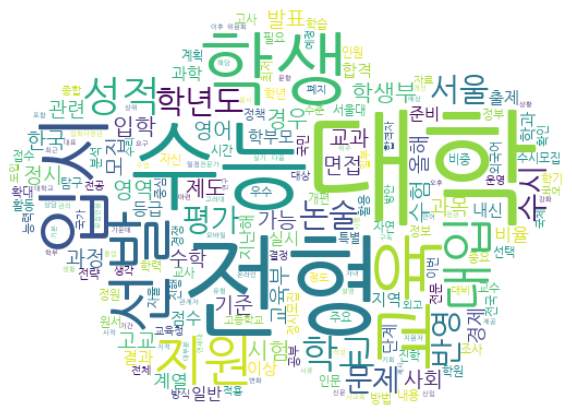

In [27]:
font_path = './Util/NanumGothic.ttf'
count = Counter(flatten(Data_terms))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('./Analyze/전체워드클라우드_tf.png')

In [28]:
# 전체 tf-idf
Data_terms2=[" ".join(x) for x in Data_terms]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)

In [29]:
result.to_excel("./Analyze/전체tf-idf.xlsx")

In [30]:
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))

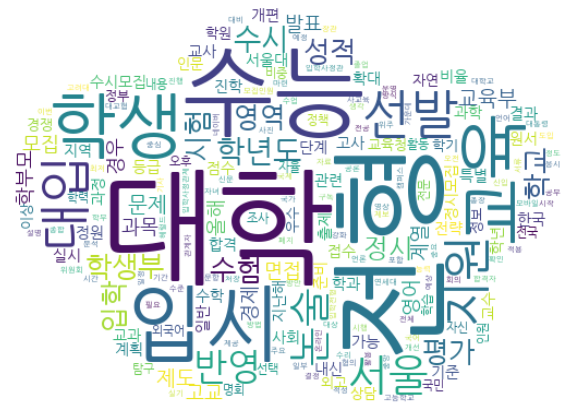

In [31]:
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('./Analyze/전체워드클라우드_tfidf.png')

In [32]:
# 연도별 분석
Data['date2']=[x.split(".")[0] for x in Data['date']]
np.unique(Data['date2'])
years=['2003','2004','2005','2006','2007','2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020']

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


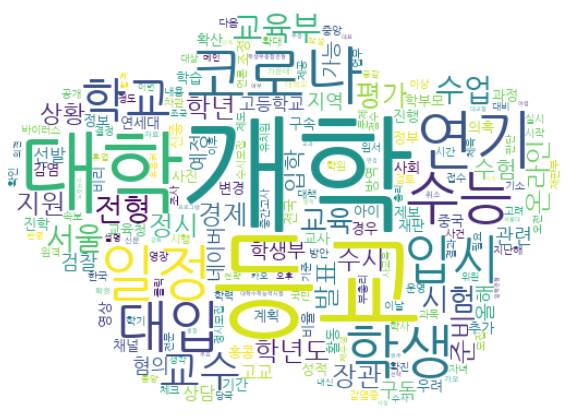

In [33]:
for i in years:
    print(i)
    Data_terms_temp=[Data_terms[x] for x in np.where(Data['date2']==str(i))[0]]
    pd.Series(flatten(Data_terms)).value_counts().to_excel("./Analyze/연도별tf_"+str(i)+".xlsx")
    count = Counter(flatten(Data_terms))
    wc = WordCloud(
        font_path = font_path,
        mask=mask_circle,
        background_color="white"
    )
    wordcloud = wc.generate_from_frequencies(count)
    array = wordcloud.to_array()
    get_ipython().run_line_magic('matplotlib', 'inline')
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fig.savefig('./Analyze/연도별워드클라우드_tf_'+str(i)+'.png')
    Data_terms2=[" ".join(x) for x in Data_terms_temp]
    tfidv = TfidfVectorizer().fit(Data_terms2)
    temp = tfidv.transform(Data_terms2)
    result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
    result=result.sort_values(by='tfidf',ascending=False)
    result.to_excel("./Analyze/연도별tf-idf_"+str(i)+".xlsx")
    font_path = './Util/NanumGothic.ttf'
    count = Counter(dict(result['tfidf']))
    wc = WordCloud(
        font_path = font_path,
        mask=mask_circle,
        background_color="white"
    )
    wordcloud = wc.generate_from_frequencies(count)
    array = wordcloud.to_array()
    get_ipython().run_line_magic('matplotlib', 'inline')
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fig.savefig('./Analyze/연도별워드클라우드_tfidf_'+str(i)+'.png')

In [34]:
# 노무현 2003.2.25.~ 2008.2.24.
# 이명박 2008.2.25.~ 2013.2.24.
# 박근혜 2013.2.25.~ 2017.5.10.
# 문재인 2017.5.10.~ 현재

In [35]:
from datetime import datetime
Data['date3']=[datetime.strptime(x,'%Y.%m.%d') for x in Data['date']]

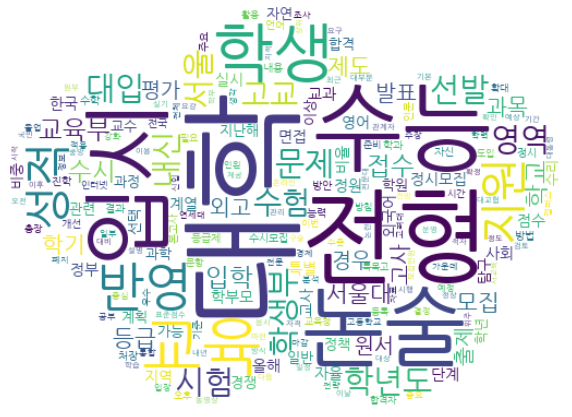

In [36]:
# 노무현 정권
Index_temp=np.where((Data['date3']>datetime.strptime("2003.02.25",'%Y.%m.%d')) & ((Data['date3']<=datetime.strptime("2008.02.24",'%Y.%m.%d'))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms)).value_counts().to_excel("./Analyze/정권별tf_노무현.xlsx")
count = Counter(flatten(Data_terms))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tf_노무현.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./Analyze/정권별tf-idf_노무현.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tfidf_노무현.png')

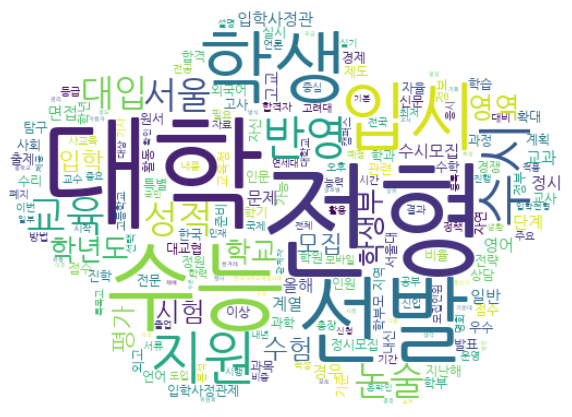

In [37]:
# 이명박 정권
Index_temp=np.where((Data['date3']>datetime.strptime("2008.02.25",'%Y.%m.%d')) & ((Data['date3']<=datetime.strptime("2013.02.24",'%Y.%m.%d'))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms)).value_counts().to_excel("./Analyze/정권별tf_이명박.xlsx")
count = Counter(flatten(Data_terms))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tf_이명박.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./Analyze/정권별tf-idf_이명박.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tfidf_이명박.png')

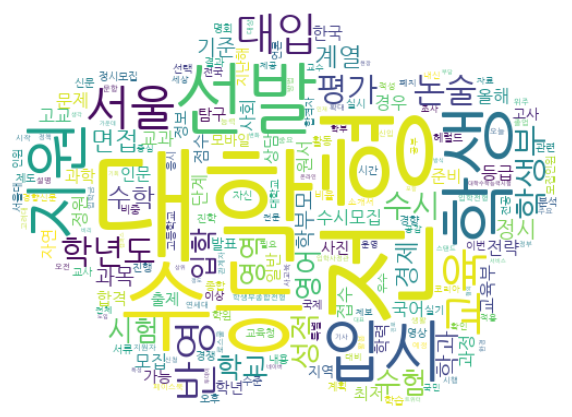

In [38]:
# 박근혜 정권
Index_temp=np.where((Data['date3']>datetime.strptime("2013.02.25",'%Y.%m.%d')) & ((Data['date3']<=datetime.strptime("2017.05.10",'%Y.%m.%d'))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms)).value_counts().to_excel("./Analyze/정권별tf_박근혜.xlsx")
count = Counter(flatten(Data_terms))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tf_박근혜.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./Analyze/정권별tf-idf_박근혜.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tfidf_박근혜.png')

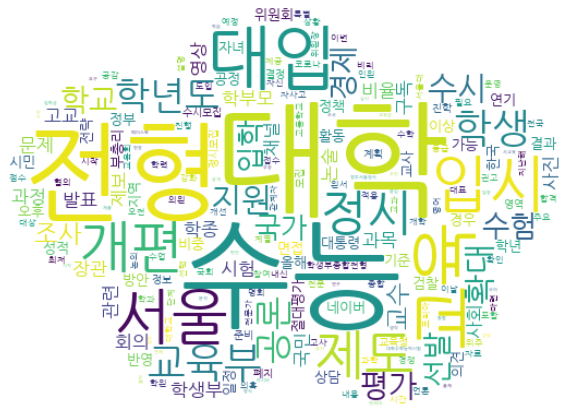

In [39]:
# 문재인 정권
Index_temp=np.where((Data['date3']>datetime.strptime("2017.05.10",'%Y.%m.%d')) & ((Data['date3']<=datetime.strptime("2020.05.22",'%Y.%m.%d'))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms)).value_counts().to_excel("./Analyze/정권별tf_문재인.xlsx")
count = Counter(flatten(Data_terms))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tf_문재인.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./Analyze/정권별tf-idf_문재인.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./Analyze/정권별워드클라우드_tfidf_문재인.png')